In [1]:
import pandas as pd

df = pd.read_csv('SpamAssasin.csv')
print(df.head())

                                      sender  \
0             Robert Elz <kre@munnari.OZ.AU>   
1  Steve Burt <Steve_Burt@cursor-system.com>   
2              "Tim Chapman" <timc@2ubh.com>   
3           Monty Solomon <monty@roscom.com>   
4  Stewart Smith <Stewart.Smith@ee.ed.ac.uk>   

                                            receiver  \
0  Chris Garrigues <cwg-dated-1030377287.06fa6d@D...   
1  "'zzzzteana@yahoogroups.com'" <zzzzteana@yahoo...   
2              zzzzteana <zzzzteana@yahoogroups.com>   
3                           undisclosed-recipient: ;   
4                          zzzzteana@yahoogroups.com   

                              date  \
0  Thu, 22 Aug 2002 18:26:25 +0700   
1  Thu, 22 Aug 2002 12:46:18 +0100   
2  Thu, 22 Aug 2002 13:52:38 +0100   
3  Thu, 22 Aug 2002 09:15:25 -0400   
4  Thu, 22 Aug 2002 14:38:22 +0100   

                                          subject  \
0                        Re: New Sequences Window   
1                       [zzzzteana] RE:

In [2]:
print(df.isnull().sum())

sender        0
receiver    210
date          0
subject      16
body          1
label         0
urls          0
dtype: int64


In [3]:
df = df.dropna()

In [4]:
print(df.isnull().sum())

sender      0
receiver    0
date        0
subject     0
body        0
label       0
urls        0
dtype: int64


In [5]:
print(df['label'].value_counts())

0    3924
1    1658
Name: label, dtype: int64


In [6]:
!pip install imbalanced-learn

Unable to create process using 'C:\Users\Mbofho Mamatsharaga\anaconda3\python.exe "C:\Users\Mbofho Mamatsharaga\anaconda3\Scripts\pip-script.py" install imbalanced-learn'


In [7]:
from imblearn.over_sampling import RandomOverSampler

ModuleNotFoundError: No module named 'imblearn'

In [8]:
df['body'] = df['body'].str.lower().str.strip()

In [9]:
from sklearn.model_selection import train_test_split

X = df['body']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train_vec, y_train)

LogisticRegression(class_weight='balanced')

In [12]:
y_pred = model.predict(X_test_vec)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.981199641897941

Confusion Matrix:
 [[768  15]
 [  6 328]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       783
           1       0.96      0.98      0.97       334

    accuracy                           0.98      1117
   macro avg       0.97      0.98      0.98      1117
weighted avg       0.98      0.98      0.98      1117



In [13]:
import joblib

joblib.dump(model, 'SpamAssasin_detector.pkl')
joblib.dump(vectorizer, 'SpamAssasin_vectorizer.pkl')

['SpamAssasin_vectorizer.pkl']

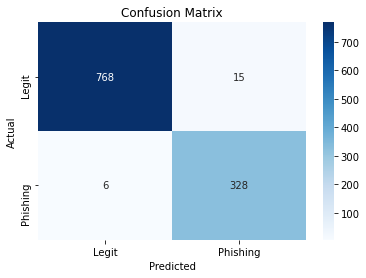

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Phishing'], yticklabels=['Legit', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()